In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*FigureCanvasAgg is non-interactive.*"
)
import os
os.environ["NIXTLA_ID_AS_COL"] = "true"
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(1)
import random
random.seed(1)
import pandas as pd
pd.set_option("max_colwidth", 100)
pd.set_option("display.precision", 3)
from utilsforecast.plotting import plot_series as plot_series_utils
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#000000", "#000000"])
from fpppy.utils import plot_series

In [3]:
x = [34, 142, 12, 13, 414]
yr = list(range(2020,2025))
df = pd.DataFrame({"Year": yr, "Observation": x})
df.set_index("Year", inplace=True)
df

,Observation
Year,
2020,34
2021,142
2022,12
2023,13
2024,414


## montly dataset uses strftime

In [4]:
df["Month"] = pd.to_datetime(
    ['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01']
)
df

,Observation,Month
Year,,
2020,34,2019-01-01
2021,142,2019-02-01
2022,12,2019-03-01
2023,13,2019-04-01
2024,414,2019-05-01


In [5]:
df['Month'] = df['Month'].dt.strftime("%Y, %b")
df

,Observation,Month
Year,,
2020,34,"2019, Jan"
2021,142,"2019, Feb"
2022,12,"2019, Mar"
2023,13,"2019, Apr"
2024,414,"2019, May"


## Time plots:

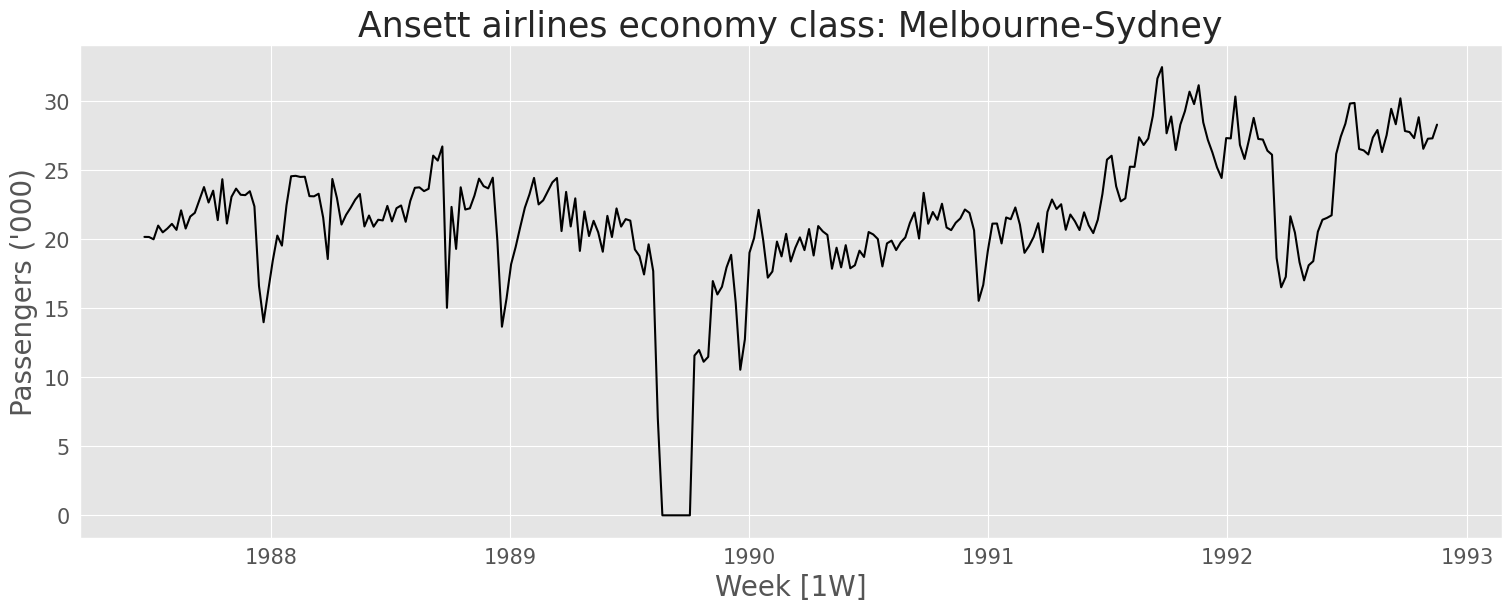

In [6]:
ansett = pd.read_csv("data/ansett.csv")
ansett["ds"] = pd.to_datetime(ansett["ds"])
melsyd_economy = ansett.query(
        'Airports == "MEL-SYD" & Class == "Economy"'
    ).copy()
melsyd_economy["y"] = melsyd_economy["y"] / 1000

plot_series(df=melsyd_economy,
            id_col="Airports",
            time_col="ds",
            target_col="y",
            ylabel="Passengers ('000)",
            xlabel="Week [1W]",
            title="Ansett airlines economy class: Melbourne-Sydney"
           )

In [10]:
total_cost_df = pd.read_csv("data/total_cost_df.csv")
total_cost_df

,Month,TotalC,Cost
0,1991-07-01,3.527e+06,3.53
1,1991-08-01,3.181e+06,3.18
2,1991-09-01,3.252e+06,3.25
3,1991-10-01,3.611e+06,3.61
4,1991-11-01,3.566e+06,3.57
...,...,...,...
199,2008-02-01,2.165e+07,21.65
200,2008-03-01,1.826e+07,18.26
201,2008-04-01,2.311e+07,23.11
202,2008-05-01,2.291e+07,22.91


In [16]:
pbs = pd.read_csv("data/PBS_unparsed.csv")
pbs["Month"] = pd.to_datetime(pbs["Month"])
pbs.head()

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991-07-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991-08-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991-09-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991-10-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991-11-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0


In [17]:
a10 = pbs.query('ATC2 == "A10"')
a10 = a10.filter(["Month", "Concession", "Type", "Cost"])
a10.head()

,Month,Concession,Type,Cost
1524,1991-07-01,Concessional,Co-payments,2.093e+06
1525,1991-08-01,Concessional,Co-payments,1.796e+06
1526,1991-09-01,Concessional,Co-payments,1.777e+06
1527,1991-10-01,Concessional,Co-payments,1.849e+06
1528,1991-11-01,Concessional,Co-payments,1.686e+06


In [18]:
total_cost_df = a10.groupby("Month", as_index=False).agg({"Cost": "sum"})
total_cost_df.rename(columns={"Cost": "TotalC"}, inplace=True)
total_cost_df.head()

,Month,TotalC
0,1991-07-01,3.527e+06
1,1991-08-01,3.181e+06
2,1991-09-01,3.252e+06
3,1991-10-01,3.611e+06
4,1991-11-01,3.566e+06


In [19]:
total_cost_df = total_cost_df.assign(
    Cost = round(total_cost_df["TotalC"] / 1e6, 2)
)
total_cost_df.head()

,Month,TotalC,Cost
0,1991-07-01,3.527e+06,3.53
1,1991-08-01,3.181e+06,3.18
2,1991-09-01,3.252e+06,3.25
3,1991-10-01,3.611e+06,3.61
4,1991-11-01,3.566e+06,3.57


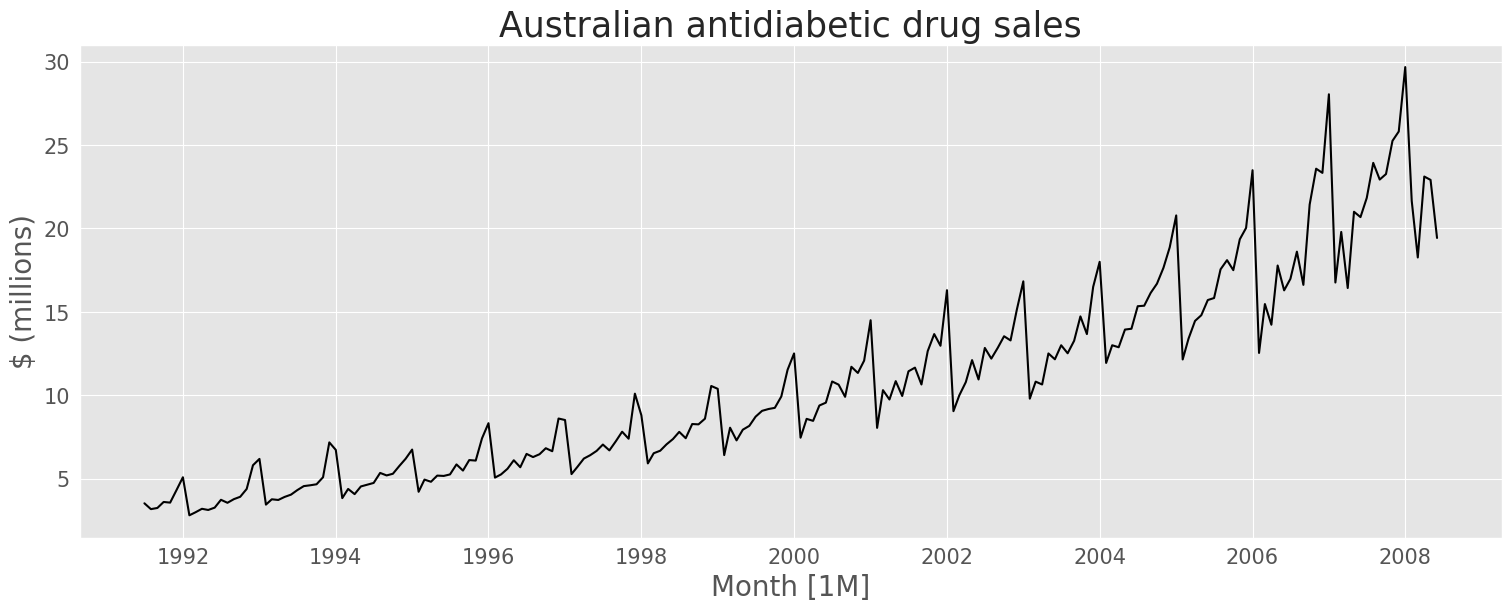

In [20]:
total_cost_df["unique_id"] = "total_cost" # Create a unique id column
plot_series(total_cost_df,
            id_col="unique_id",
            time_col="Month",
            target_col="Cost",
            xlabel="Month [1M]",
            ylabel="$ (millions)",
            title="Australian antidiabetic drug sales")

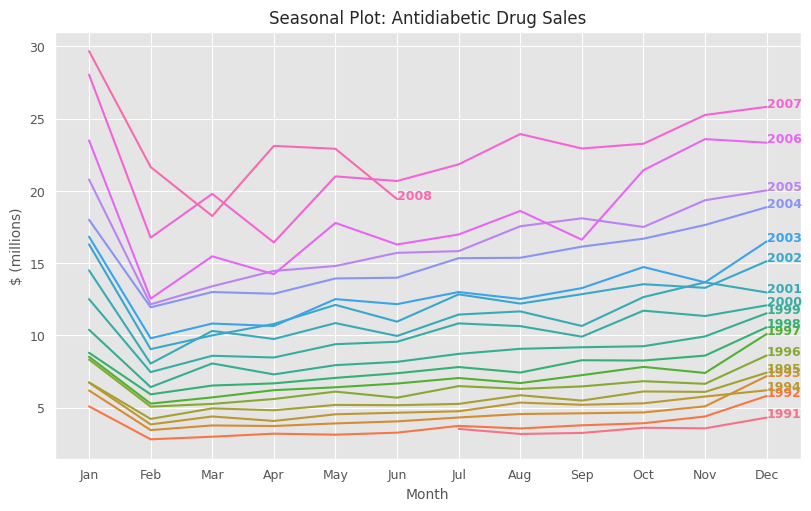

In [21]:
total_cost_df["Month_name"] = total_cost_df["Month"].dt.strftime("%b")
total_cost_df["Year"] = total_cost_df["Month"].dt.year
total_cost_df["Month_num"] = total_cost_df["Month"].dt.month

unique_years = total_cost_df["Year"].unique()
year_palette = sns.color_palette("husl", n_colors=len(unique_years))

fig, ax = plt.subplots()
sns.lineplot(
    data=total_cost_df,
    x="Month_num",
    y="Cost",
    hue="Year",
    palette=year_palette,
    legend=False,
    ax=ax,
)
ax.set_title("Seasonal Plot: Antidiabetic Drug Sales")
ax.set_xlabel("Month")
ax.set_ylabel("$ (millions)")
ax.set_xticks(
    ticks=range(1, 13),
    labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ],
)

min_year = unique_years.min()
for year, subset in total_cost_df.groupby("Year"):
    ax.text(
        subset["Month_num"].iloc[-1],
        subset["Cost"].iloc[-1],
        str(year),
        fontsize=9,
        weight="bold",
        color=year_palette[year - min_year],
    )

fig.show()

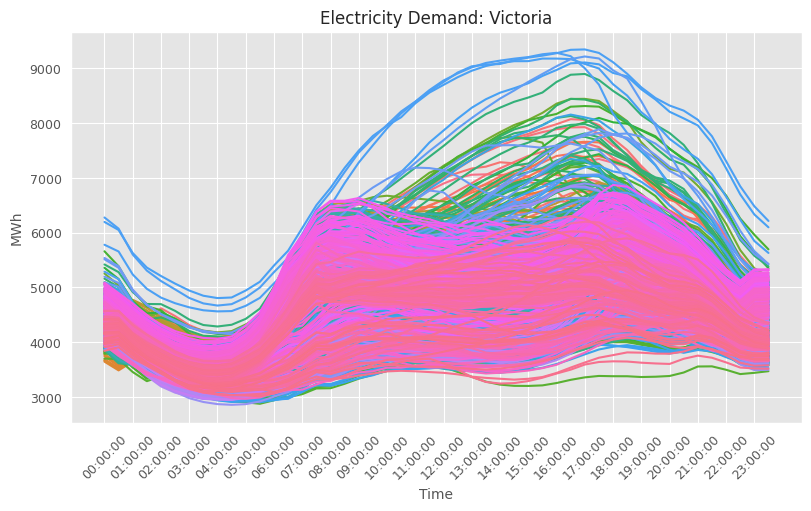

In [22]:
vic_elec_df = pd.read_csv("data/vic_elec.csv")
vic_elec_df["ds"] = pd.to_datetime(vic_elec_df["ds"])
vic_elec_demand = vic_elec_df[vic_elec_df["unique_id"] == "Demand"].copy()
vic_elec_demand["hour-minute"] = \
  vic_elec_demand["ds"].dt.strftime("%H:%M:%S")
vic_elec_demand["day"] = vic_elec_demand["ds"].dt.date

fig, ax = plt.subplots()
sns.lineplot(
    data=vic_elec_demand,
    x="hour-minute",
    y="y",
    hue="day",
    palette="husl",
    legend=False,
    ax=ax,
)
unique_ticks = vic_elec_demand["hour-minute"].unique()
ticks_to_plot = unique_ticks[::2]
ax.set_xticks(ticks=range(0, len(unique_ticks), 2), labels=ticks_to_plot,
    rotation=45)
ax.set_title("Electricity Demand: Victoria")
ax.set_xlabel("Time")
ax.set_ylabel("MWh")
fig.show()

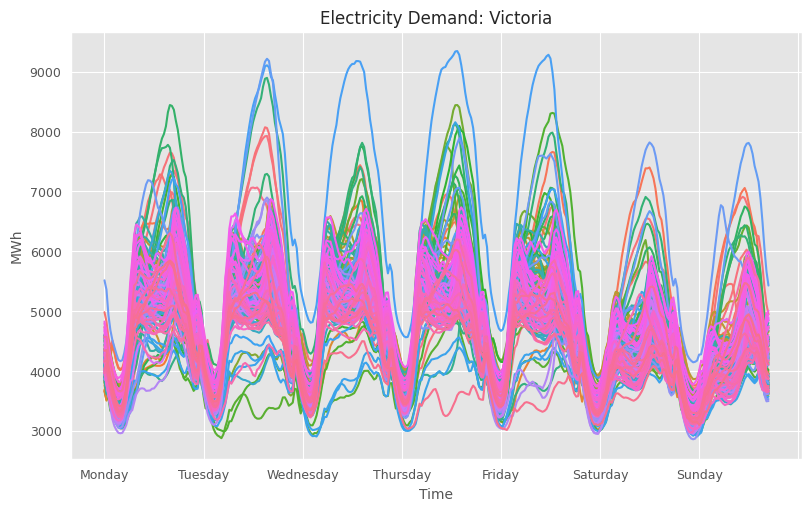

In [23]:
vic_elec_demand["day_of_week"] = vic_elec_demand["ds"].dt.day_name()
vic_elec_demand = vic_elec_demand[
    (vic_elec_demand["ds"] >= "2012-01-02") &
    (vic_elec_demand["ds"] < "2014-12-29")
].copy()

weeks = vic_elec_demand["ds"].dt.to_period("W-SUN").dt.start_time
unique_weeks = weeks.unique()
palette = sns.color_palette("husl", n_colors=len(unique_weeks))
color_map = dict(zip(unique_weeks, palette))

groups = vic_elec_demand["ds"].dt.to_period("W-SUN").dt.start_time
fig, ax = plt.subplots()
for df_week in vic_elec_demand.groupby(groups):
    week, df_w = df_week
    df_w.plot(
        y="y",
        x="day_of_week",
        ax=ax,
        color=color_map[week],
        label=str(week.date())
    )
ax.get_legend().remove()
ax.set_title("Electricity Demand: Victoria")
ax.set_ylabel("MWh")
ax.set_xlabel("Time")
fig.show()

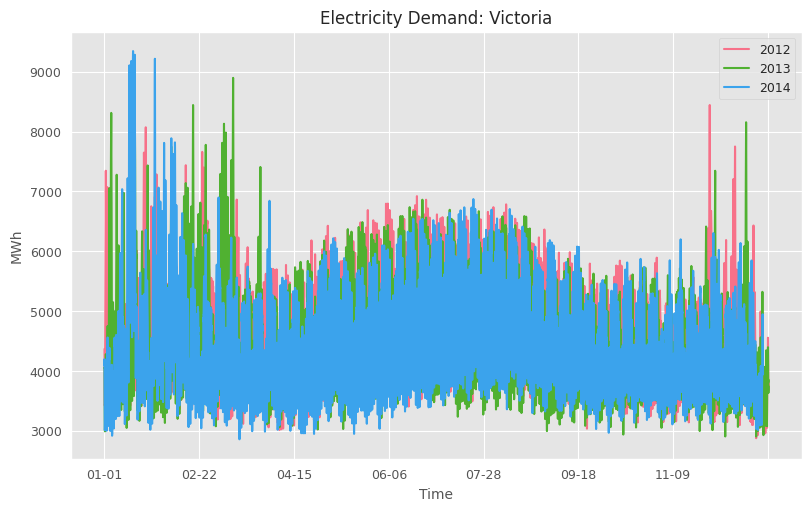

In [24]:
vic_elec_demand["day_of_year"] = vic_elec_demand["ds"].dt.strftime("%m-%d")

unique_years = vic_elec_demand["ds"].dt.year.unique()
palette = sns.color_palette("husl", n_colors=len(unique_years))
color_map = dict(zip(unique_years, palette))

fig, ax = plt.subplots()
for df_year in vic_elec_demand.groupby(vic_elec_demand["ds"].dt.year):
    year, df_y = df_year
    df_y.plot(
        y="y",
        x="day_of_year",
        ax=ax,
        label=str(year),
        color=color_map[year]
    )
ax.set_title("Electricity Demand: Victoria")
ax.set_ylabel("MWh")
ax.set_xlabel("Time")
fig.show()

/tmp/ipykernel_112643/3284505244.py:31: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.2)


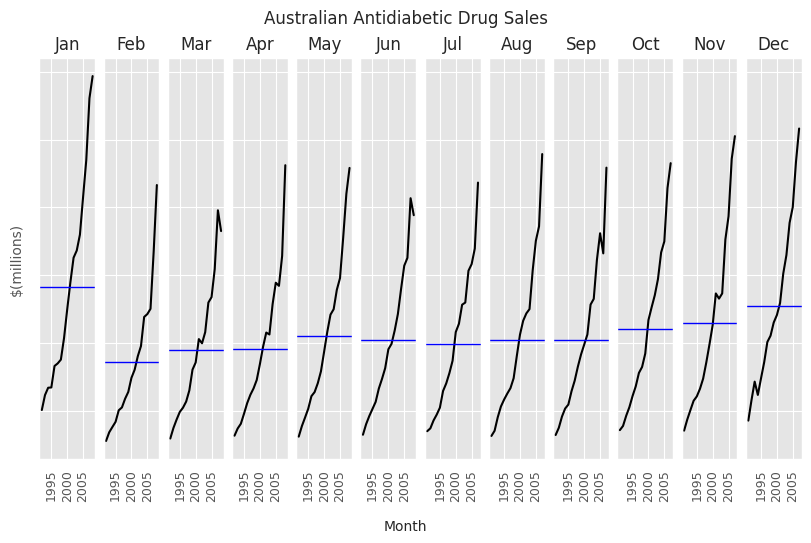

In [25]:
total_cost_df["Month"] = pd.to_datetime(total_cost_df["Month"])
total_cost_df["year"] = total_cost_df["Month"].dt.year
total_cost_df["month"] = total_cost_df["Month"].dt.strftime("%B")
total_cost_df["month"] = pd.Categorical(
  total_cost_df["month"],
  categories=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December",
  ],
  ordered=True,
)

fig, axes = plt.subplots(nrows=1, ncols=12, sharey=True)
for i, month in enumerate(total_cost_df["month"].cat.categories):
    month_data = total_cost_df.query("month == @month")
    mean_cost = month_data["Cost"].mean()
    axes[i].plot(month_data["year"], month_data["Cost"], color="black")
    axes[i].axhline(
        mean_cost, color="blue", linestyle="-", linewidth=1, label="Average"
    )
    axes[i].set_title(month[:3])
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=90)
    if i == 0:
        axes[i].set_ylabel("$(millions)")
    else:
        axes[i].set_yticklabels([])

fig.suptitle("Australian Antidiabetic Drug Sales")
fig.text(0.5, -0.05, "Month", ha="center")
fig.subplots_adjust(wspace=0.2)
fig.show()

In [26]:
tourism = pd.read_csv("data/tourism.csv")
tourism["ds"] = pd.to_datetime(tourism["ds"])
tourism["Quarter"] = tourism["ds"].dt.to_period("Q").astype(str)
tourism_sub = tourism.query('Purpose == "Holiday"')
trips = tourism_sub.groupby(["State", "ds"], as_index=False)["y"].sum().round(2)

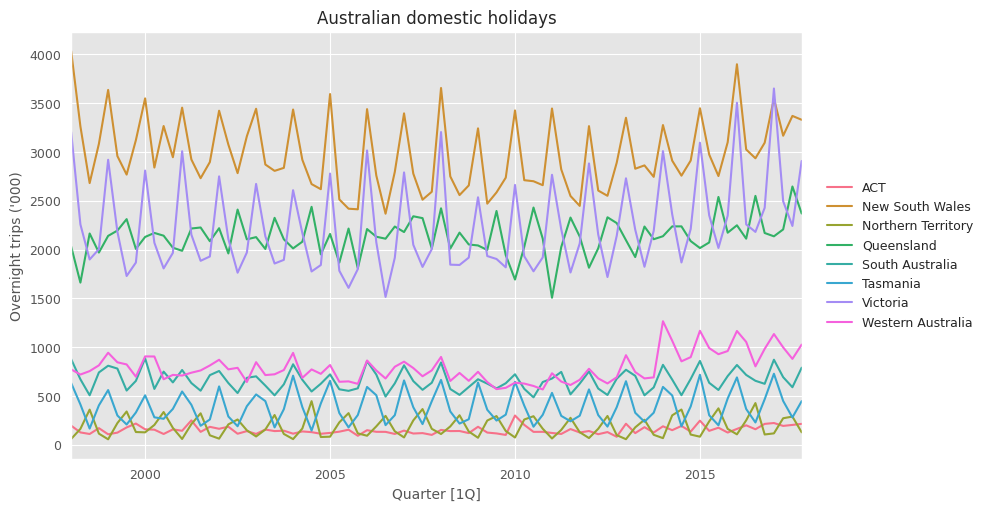

In [27]:
states = trips["State"].unique()
colors = sns.color_palette("husl", len(states))
fig, ax = plt.subplots()
for state, color in zip(states, colors):
    state_df = trips.query("State == @state")
    state_df.plot(y="y", x="ds", ax=ax, label=state, color=color)
ax.set_title("Australian domestic holidays")
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
fig.legend(
    handles, labels, loc="center left", bbox_to_anchor=(1.02, .5),
    frameon=False, borderaxespad=0,
)

ax.set_ylabel("Overnight trips ('000)")
ax.set_xlabel("Quarter [1Q]")
fig.show()

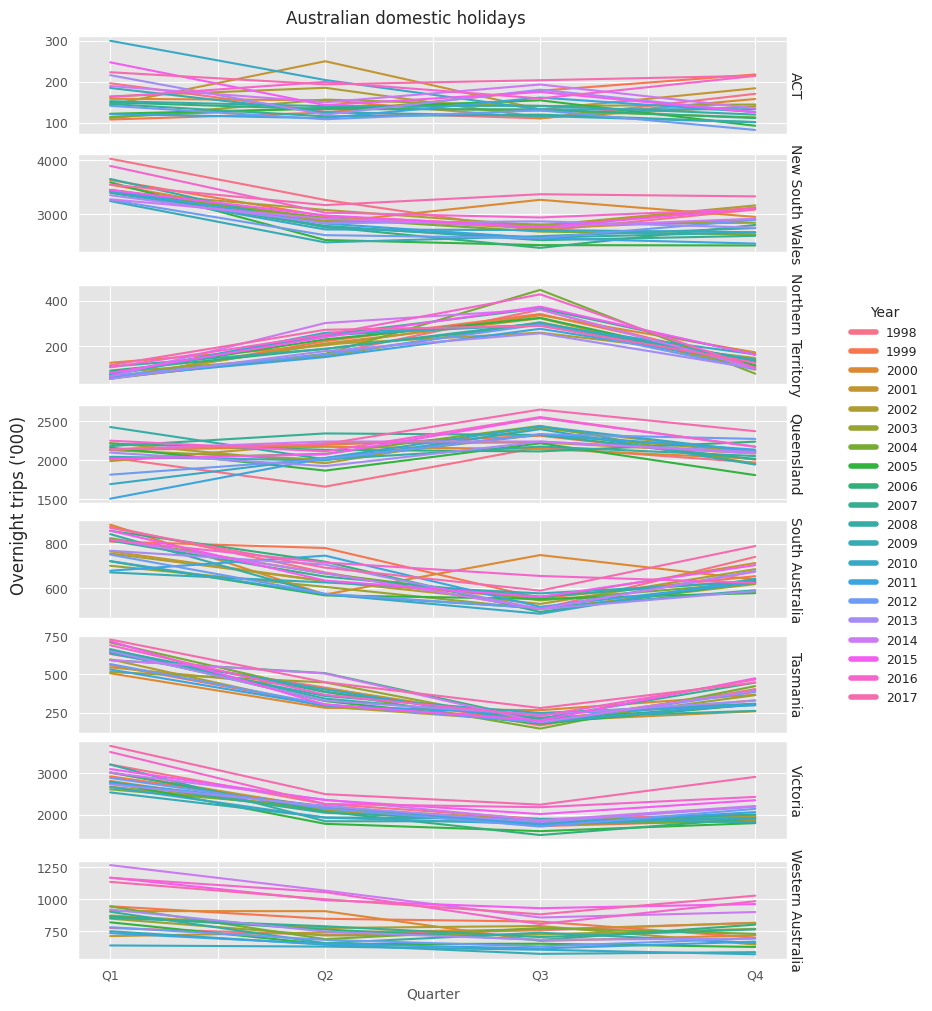

In [28]:
trips["Quarter"] = "Q" + trips["ds"].dt.quarter.astype(str)
trips["Year"] = trips["ds"].dt.year
years = sorted(trips["Year"].unique())
palette = sns.color_palette("husl", len(years))
year_to_color = dict(zip(years, palette))

n_states = trips["State"].nunique()

fig, axs = plt.subplots(n_states, 1, sharex=True, figsize=(8, 10))
for ax, (state, df_state) in zip(axs, trips.groupby("State")):
    pivot_data = df_state.pivot(index="Quarter", columns="Year", values="y")
    pivot_data.plot(ax=ax, color=[year_to_color[year] for year in pivot_data.columns])
    ax.get_legend().remove()
    ax.text(1.02, 0.5, state, va="center", ha="right", rotation=270,
        fontsize=10, transform=ax.transAxes)

handles = [plt.Line2D([0], [0], color=year_to_color[year], lw=4) for year in years]
labels = [str(year) for year in years]
fig.legend(handles, labels, title="Year", loc="center left", bbox_to_anchor=(1.05, 0.5), frameon=False, borderaxespad=0)

fig.supylabel("Overnight trips ('000)")
fig.suptitle("Australian domestic holidays")
fig.show()

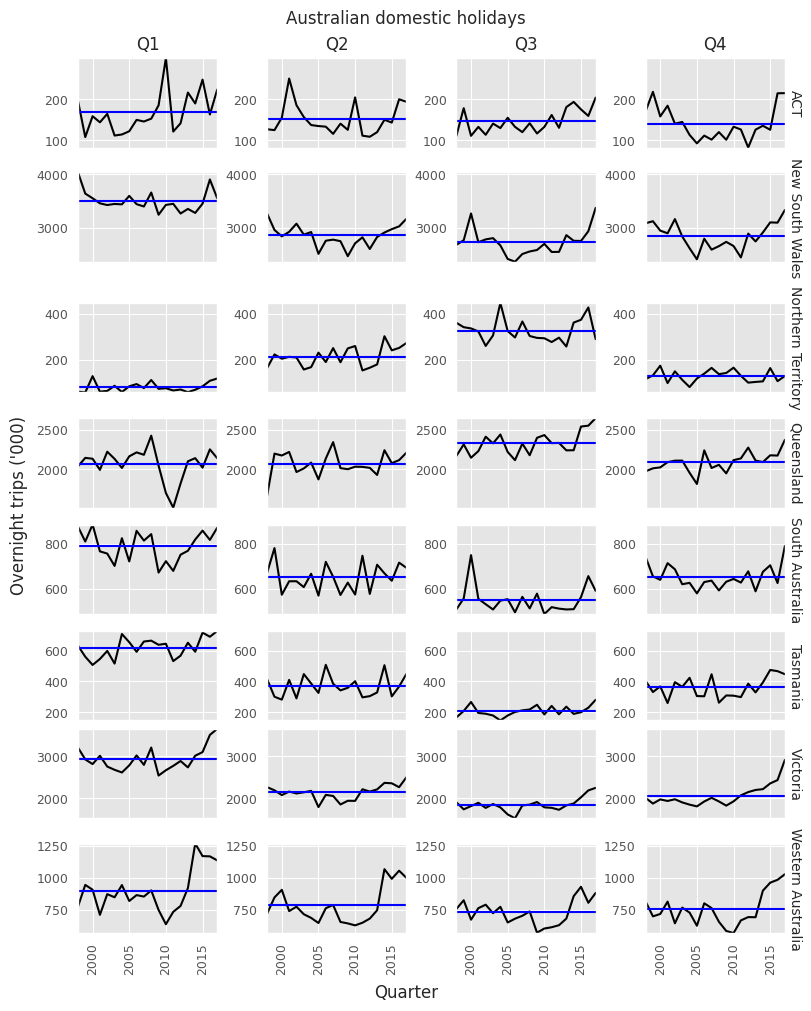

In [29]:
fig, axs = plt.subplots(n_states, 4, sharex=True, figsize=(8, 10))
axs = axs.flatten()
quarters = sorted(trips["Quarter"].unique())
states = sorted(trips["State"].unique())
for idx, (state_i, df_state) in enumerate(trips.groupby("State")):
    y_state_min, y_state_max = df_state["y"].min(), df_state["y"].max()
    for jdx, (quart_i, df_state_quart) in \
            enumerate(df_state.groupby("Quarter")):
        axi = axs[idx * 4 + jdx]
        df_state_quart.plot(y="y", x="ds", label=None, ax=axi,
            color="black")
        axi.axhline(df_state_quart["y"].mean(), color="blue")
        axi.set_ylim(y_state_min, y_state_max)
        axi.set_xlabel("")
        axi.tick_params(axis="x", rotation=90)
        axi.get_legend().remove()
for j, quarter in enumerate(quarters):
    axs[j].set_title(quarter)
for i, state in enumerate(states):
    axs[i * 4 + 3].text(
        1.02, 0.5, state, va="center", ha="left", rotation=270,
        transform=axs[i * 4 + 3].transAxes
    )
fig.supylabel("Overnight trips ('000)", va="center", rotation=90)
fig.supxlabel("Quarter", ha="center")
fig.suptitle("Australian domestic holidays")
fig.show()



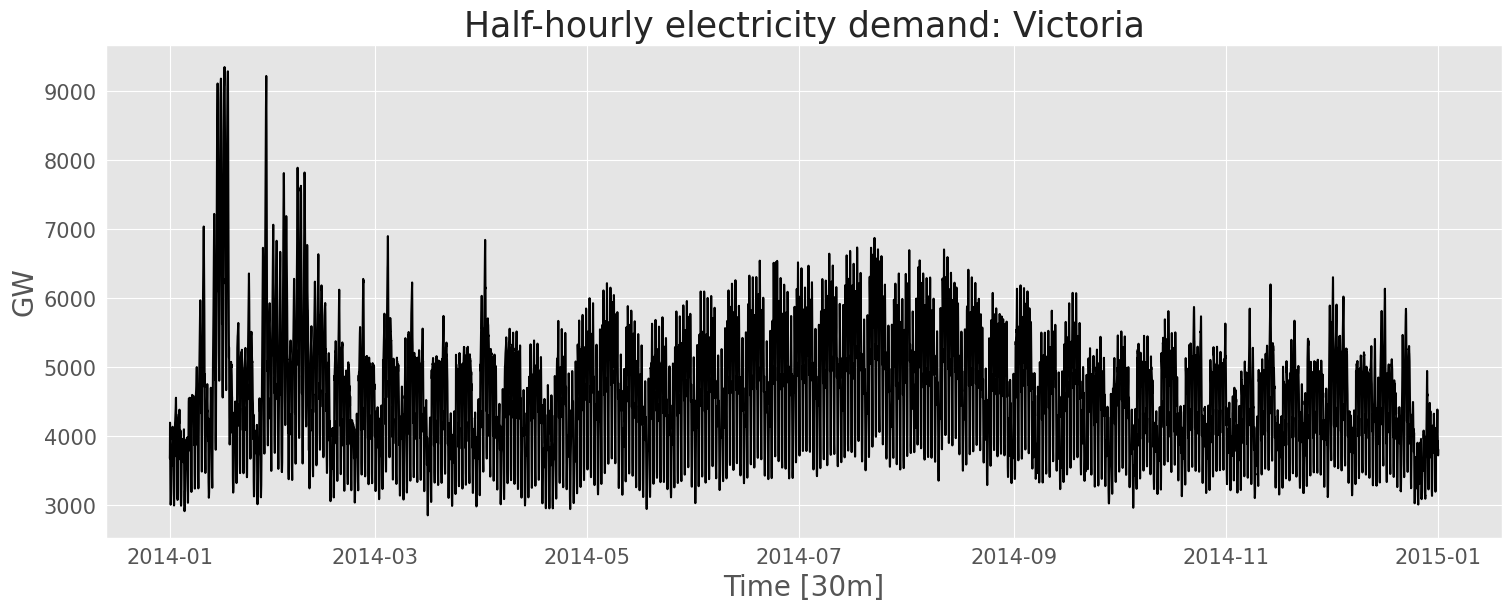

In [30]:
plot_series(vic_elec_df, ids=["Demand"],
            max_insample_length=2 * 24 * 365,
            xlabel="Time [30m]",
            ylabel="GW",
            title="Half-hourly electricity demand: Victoria")

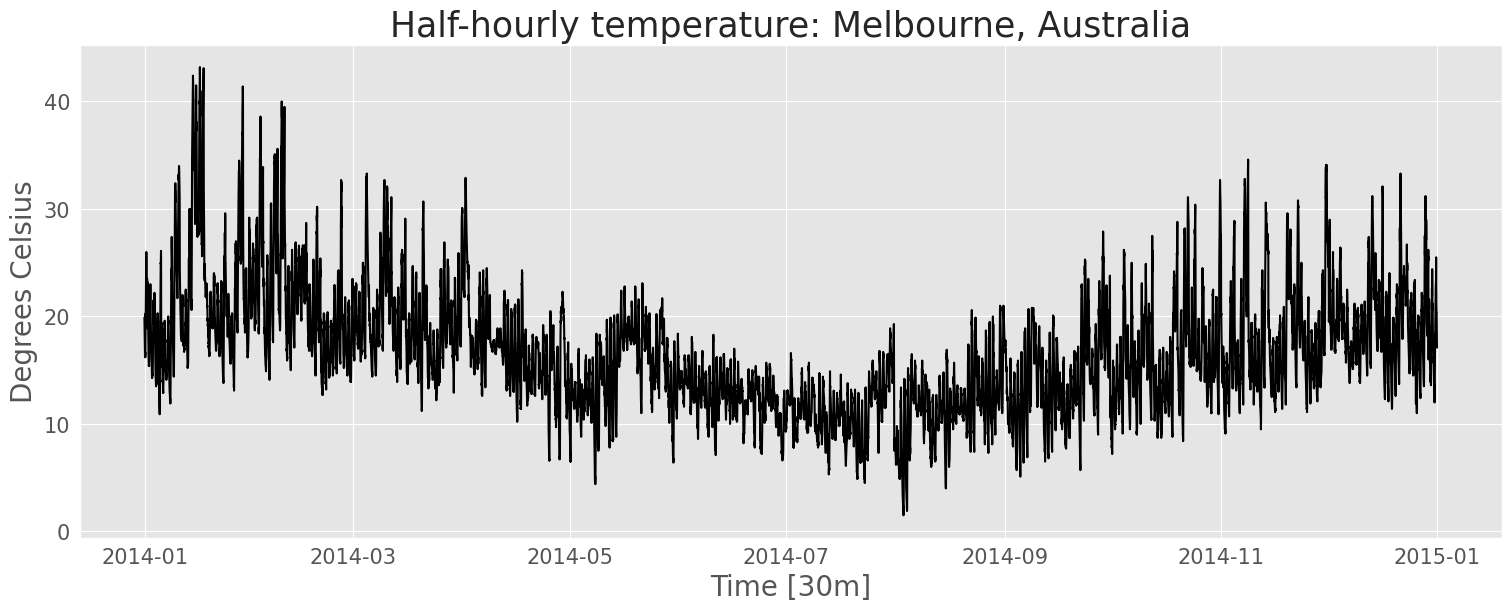

In [31]:
plot_series(vic_elec_df, ids=["Temperature"],
            max_insample_length=2 * 24 * 365,
            xlabel="Time [30m]",
            ylabel="Degrees Celsius",
            title="Half-hourly temperature: Melbourne, Australia")

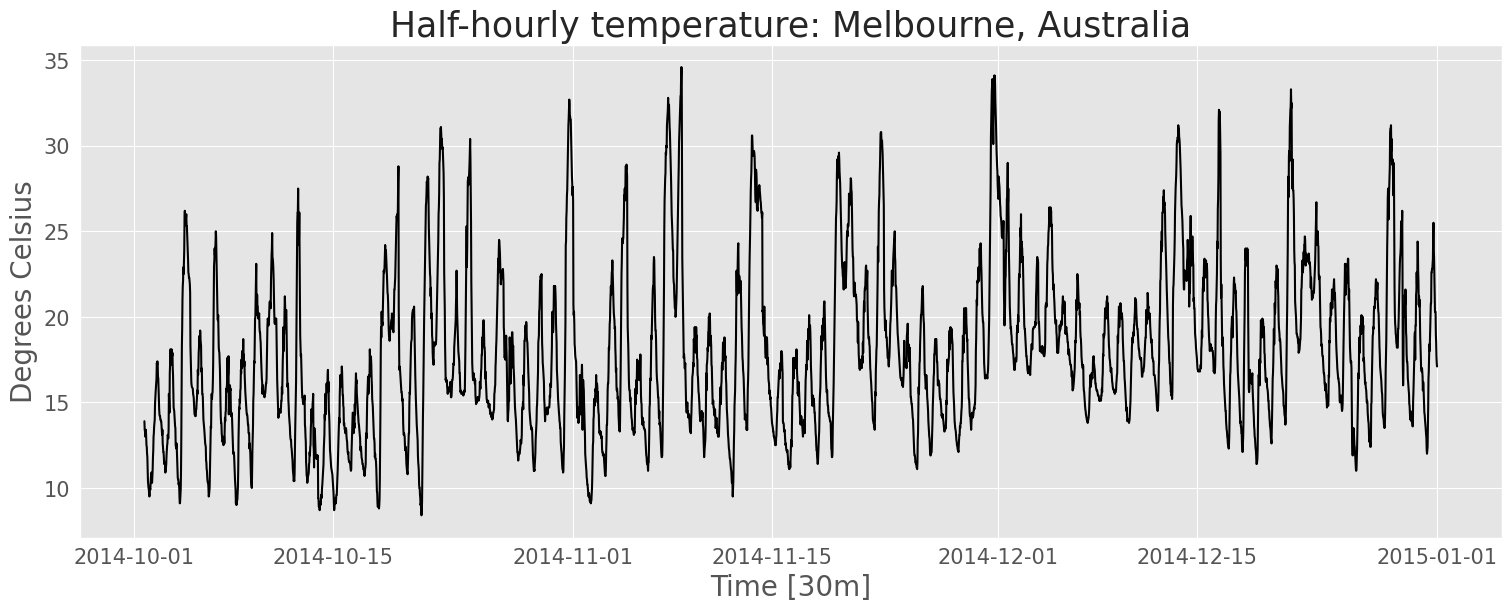

In [34]:
plot_series(vic_elec_df, ids=["Temperature"],
            max_insample_length=0.5 * 24 * 365,
            xlabel="Time [30m]",
            ylabel="Degrees Celsius",
            title="Half-hourly temperature: Melbourne, Australia")

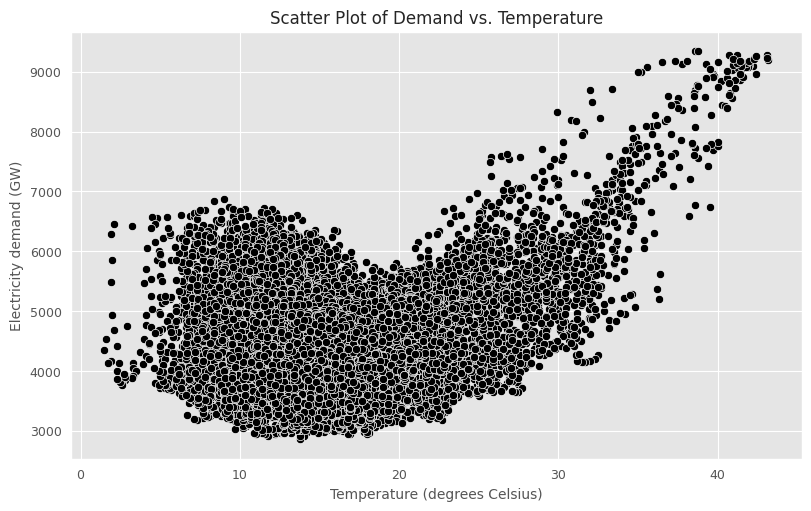

In [35]:
elec_2014 = vic_elec_df.query('ds >= "2014"')
elec_2014_pivot = elec_2014.pivot(
    index=["ds", "Holiday"], columns="unique_id", values="y"
).reset_index()
fig, ax = plt.subplots()
sns.scatterplot(data=elec_2014_pivot, x="Temperature", y="Demand", ax=ax)
ax.set_title("Scatter Plot of Demand vs. Temperature")
ax.set_xlabel("Temperature (degrees Celsius)")
ax.set_ylabel("Electricity demand (GW)")
fig.show()

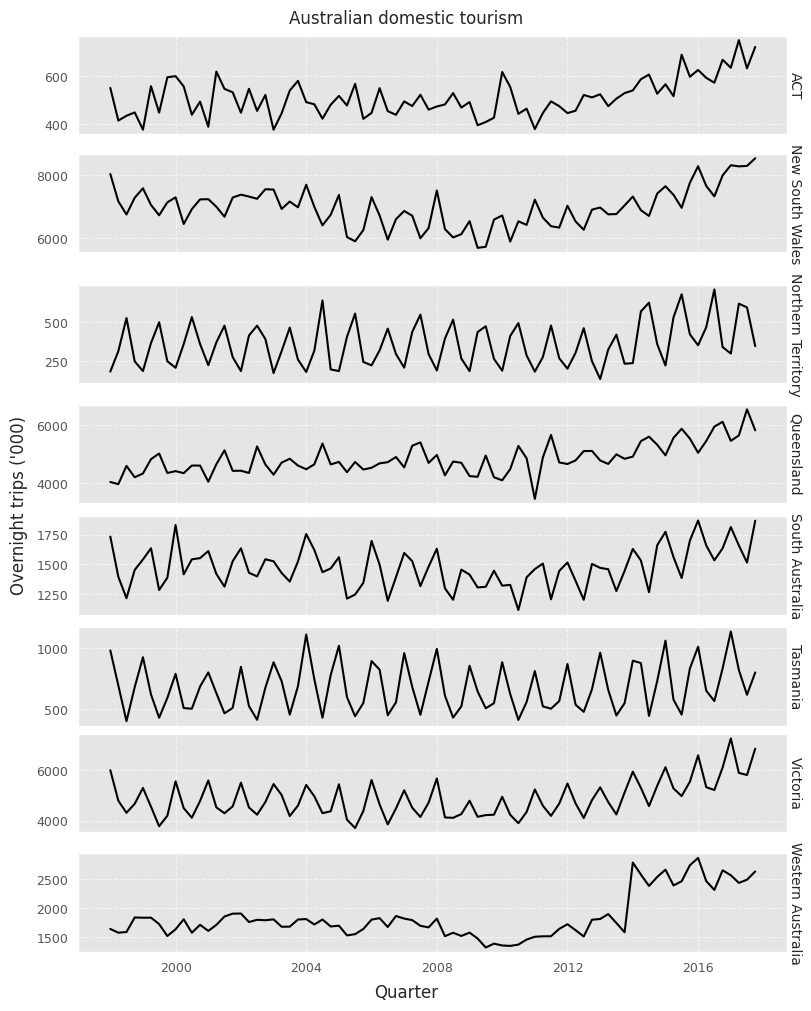

In [36]:
visitors = tourism.groupby(["State", "ds"], as_index=False)["y"].sum()
n_states = visitors["State"].nunique()
fig, axs = plt.subplots(n_states, 1, sharex=True, figsize=(8, 10))
for ax, (state, df_state) in zip(axs, visitors.groupby("State")):
    ax.plot(df_state["ds"], df_state["y"])
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.text(1.02, 0.5, state, va="center", ha="right",
        rotation=270, transform=ax.transAxes)
fig.suptitle("Australian domestic tourism")
fig.supylabel("Overnight trips ('000)", va="center", rotation=90)
fig.supxlabel("Quarter", ha="center")
fig.show()

/home/jack/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


NameError: name 'pearsonr' is not defined

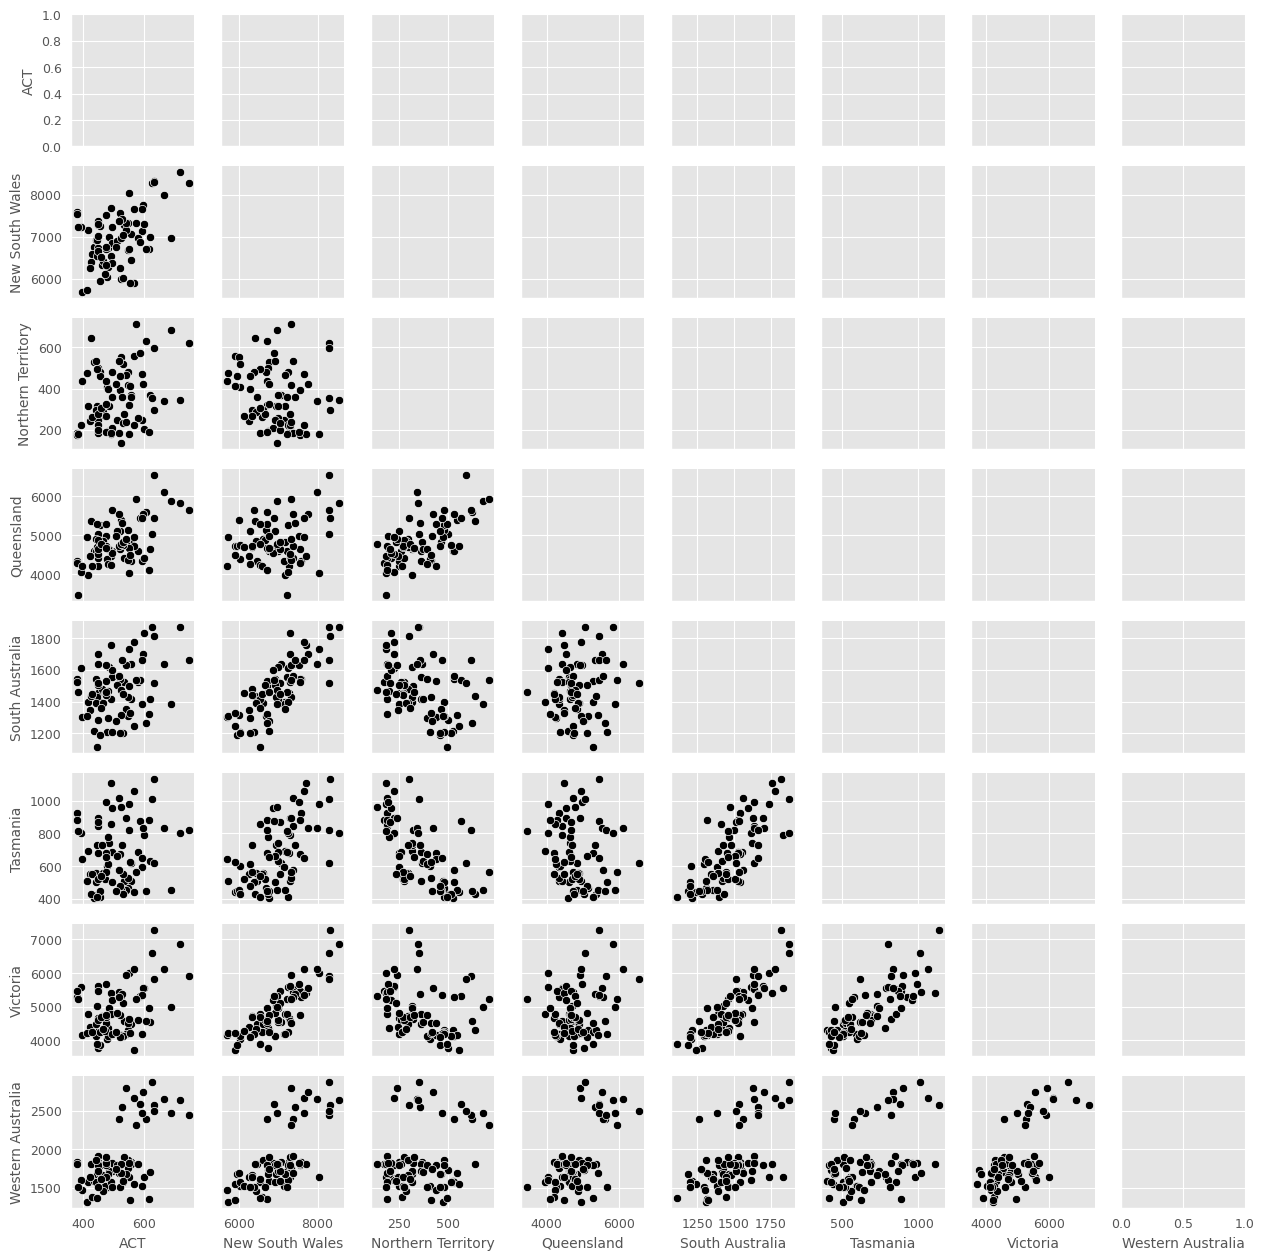

In [37]:
visitors_pivot = \
    visitors.pivot(index="ds", columns="State", values="y").reset_index()
df_for_plot = visitors_pivot.drop(columns=["ds"])

def corrfunc(x, y, **kws):
    r, pvalue = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        f"Corr: \n{r:.3f}{'***' if pvalue < 0.05 else ''}",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
    )


g = sns.PairGrid(df_for_plot, height=1.6)
g.map_lower(sns.scatterplot)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw=2)

# Remove default axis labels
g.set(xlabel="")

# Move y-axis labels to the top
for i, col in enumerate(df_for_plot.columns):
    g.axes[0, i].set_title(col, fontsize=12)

fig.show()